In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data_dir = '../datasets/virat/sample_data/'
annotation_dir = data_dir + 'annotations/'
video_dir = data_dir + 'videos/'

## Data Cleaning
The annotation text files provided by VIRAT dataset seem to contain some encoding errors (see screenshot below). Some manual cleanup will help remove these discrepencies and help load in the data, albeit leaving us with some frames without labels (which is okay). 

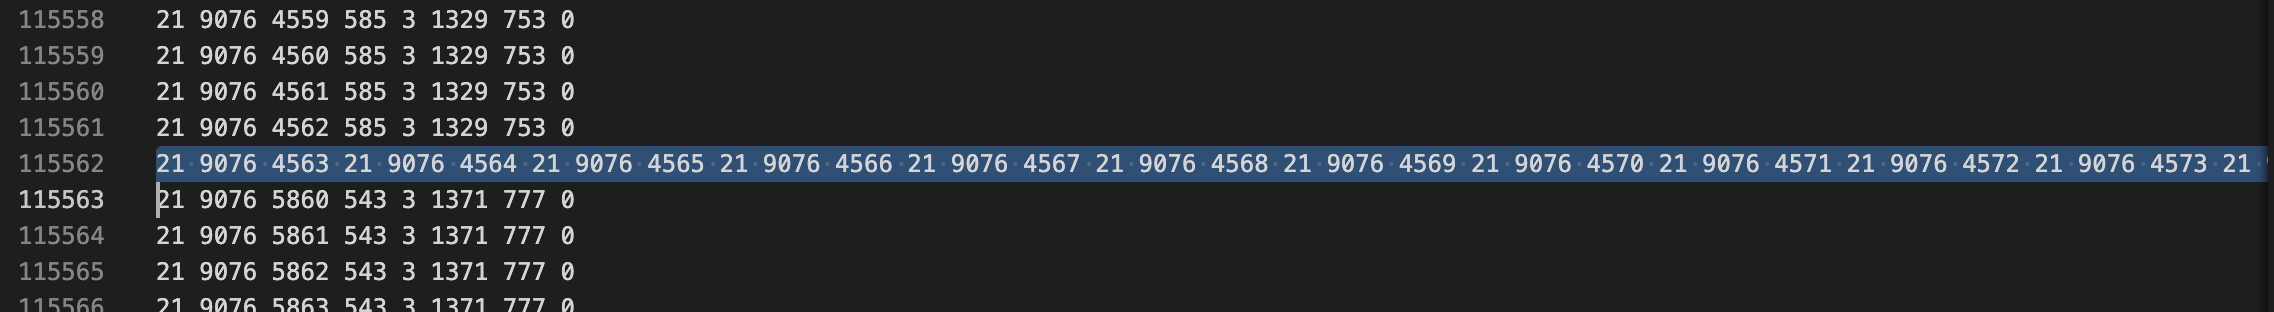

In [3]:
from IPython.display import Image
Image(filename='./assets/virat_dataset_processing.png') 

In [4]:
video = "VIRAT_S_000002"
video_event_path = annotation_dir + f'{video}.viratdata.events.txt'
video_object_path = annotation_dir + f'{video}.viratdata.objects.txt'
video_mapping_path = annotation_dir + f'{video}.viratdata.mapping.txt'

video_event = pd.read_csv(video_event_path, delim_whitespace=True, header=None)
video_object = pd.read_csv(video_object_path, delim_whitespace=True, header=None)
video_mapping = pd.read_csv(video_mapping_path, delim_whitespace=True, header=None)

In [5]:
event_columns = {
0: "event_id",        
1: "event_type",      
2: "duration", 
3: "start_frame",     
4: "end_frame",       
5: "current_frame",   
6: "bbox_lefttop_x", 
7: "bbox_lefttop_y", 
8: "bbox_width",      
9: "bbox_height",    
}

object_columns = {
0: "object_id",        
1: "object_duration", 
2: "current_frame",
3: "bbox_lefttop_x", 
4: "bbox_lefttop_y", 
5: "bbox_width",      
6: "bbox_height",
7: "object_type"
}

mapping_columns = {
0: "event_id",
1: "event_type",
2: "event_duration",
3: "start_frame",
4: "end_frame",
5: "num_obj" ,
}

event_typeid = {
    1: "Person loading an Object to a Vehicle",
    2: "Person Unloading an Object from a Car/Vehicle",
    3: "Person Opening a Vehicle/Car Trunk",
    4: "Person Closing a Vehicle/Car Trunk",
    5: "Person getting into a Vehicle",
    6: "Person getting out of a Vehicle",
    7: "Person gesturing",
    8: "Person digging",
    9: "Person carrying an object",
    10: "Person running",
    11: "Person entering a facility",
    12: "Person exiting a facility",
}

object_typeid = {
    1: "person",
    2: "car",
    3: "vehicles",
    4: "object",
    5: "bike, bicycles"
}


In [6]:
video_event = video_event.rename(event_columns, axis=1)
video_object = video_object.rename(object_columns, axis=1)
video_mapping = video_mapping.rename(mapping_columns, axis=1)

In [7]:
video_event.head()

,event_id,event_type,duration,start_frame,end_frame,current_frame,bbox_lefttop_x,bbox_lefttop_y,bbox_width,bbox_height
0,0,6,134,2486,2619,2486,786,501,248,210
1,0,6,134,2486,2619,2487,786,501,248,210
2,0,6,134,2486,2619,2488,786,501,248,210
3,0,6,134,2486,2619,2489,786,501,248,210
4,0,6,134,2486,2619,2490,786,501,248,210


In [8]:
video_object.head()

,object_id,object_duration,current_frame,bbox_lefttop_x,bbox_lefttop_y,bbox_width,bbox_height,object_type
0,2,9076,0,1262,381,53,116,1
1,2,9076,1,1261,381,53,116,1
2,2,9076,2,1260,381,53,116,1
3,2,9076,3,1259,381,53,116,1
4,2,9076,4,1258,381,53,116,1


In [9]:
video_mapping.head()

,event_id,event_type,event_duration,start_frame,end_frame,num_obj,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,6,134,2486,2619,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,65,3951,4015,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,59,4119,4177,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,5,134,4366,4499,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,121,4005,4125,3,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
